In [3]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sat Jan 20 09:59:32 2018

@author: alex
"""

'\nCreated on Sat Jan 20 09:59:32 2018\n\n@author: alex\n'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import h5py
from sklearn import linear_model

In [3]:
%pwd

u'/Users/laurens.geffert/local/personal/future_challenge_hackathon/code'

In [4]:
file_path_cities = "../data/CityData.csv"
file_path_train = "../data/ForecastDataforTraining_201712.csv"
file_path_test = "../data/In_situMeasurementforTraining_201712.csv"
file_path_predict = "../data/ForecastDataforTesting_201712.csv"

In [6]:
city = pd.read_csv(file_path_cities, header=0)

In [7]:
train = pd.read_csv(file_path_train, header=0)

IOError: File ../data/ForecastDataforTraining_201712.csv does not exist

In [8]:
test = pd.read_csv(file_path_test, header=0)

IOError: File ../data/In_situMeasurementforTraining_201712.csv does not exist

In [9]:
predict = pd.read_csv(file_path_predict, header=0)

In [14]:
test.head()

,xid,yid,date_id,hour,wind
0,1,1,1,3,12.8
1,1,2,1,3,12.8
2,1,3,1,3,12.6
3,1,4,1,3,12.1
4,1,5,1,3,11.6


In [21]:
train = np.zeros((5,20-3+1,11,548,421)) #initialize an empty 5D tensor
print('start processing traindata')
with open('../data/ForecastDataforTraining_201712.csv') as trainfile:
    for index,line in enumerate(trainfile):
        #traindata format
        #xid,yid,date_id,hour,model,wind
        #1,1,1,3,1,13.8

        traindata = line.split(',')
        try:
            x = int(traindata[0])
            y = int(traindata[1])
            d = int(traindata[2])
            h = int(traindata[3])
            m = int(traindata[4])
            w = float(traindata[5])
            train[d-1,h-3,m-1,x-1,y-1] = w # write values into tensor
            
            if index%1000000==0:
                print('%i lines has been processed' %(index))
        except ValueError:
            print('found line with datatype error! skip this line')
            continue

start processing traindata
found line with datatype error! skip this line
1000000 lines has been processed
2000000 lines has been processed
3000000 lines has been processed
4000000 lines has been processed
5000000 lines has been processed
6000000 lines has been processed
7000000 lines has been processed
8000000 lines has been processed
9000000 lines has been processed
10000000 lines has been processed
11000000 lines has been processed
12000000 lines has been processed
13000000 lines has been processed
14000000 lines has been processed
15000000 lines has been processed
16000000 lines has been processed
17000000 lines has been processed
18000000 lines has been processed
19000000 lines has been processed
20000000 lines has been processed
21000000 lines has been processed
22000000 lines has been processed
23000000 lines has been processed
24000000 lines has been processed
25000000 lines has been processed
26000000 lines has been processed
27000000 lines has been processed
28000000 lines ha

In [14]:
predict.describe()

,xid,yid,date_id,hour,model,wind
count,2.076372e+08,2.076372e+08,2.076372e+08,2.076372e+08,2.076372e+08,2.076372e+08
mean,2.745000e+02,2.110000e+02,8.000000e+00,1.150000e+01,5.500000e+00,1.811199e+01
std,1.581937e+02,1.215319e+02,1.414214e+00,5.188127e+00,2.872281e+00,7.591337e+00
min,1.000000e+00,1.000000e+00,6.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00
25%,1.377500e+02,1.060000e+02,7.000000e+00,7.000000e+00,3.000000e+00,1.300000e+01
50%,2.745000e+02,2.110000e+02,8.000000e+00,1.150000e+01,5.500000e+00,1.730000e+01
75%,4.112500e+02,3.160000e+02,9.000000e+00,1.600000e+01,8.000000e+00,2.290000e+01
max,5.480000e+02,4.210000e+02,1.000000e+01,2.000000e+01,1.000000e+01,5.730000e+01


In [15]:
predict.head()

,xid,yid,date_id,hour,model,wind
0,1,1,6,3,1,10.00
1,1,1,6,3,2,8.61
2,1,1,6,3,3,9.18
3,1,1,6,3,4,14.90
4,1,1,6,3,5,7.85


In [19]:
test = np.zeros((5,20-3+1,10,548,421))
print('start processing traindata')
with open(file_path_predict) as trainfile:
    for index,line in enumerate(trainfile):
        #traindata format
        #xid,yid,date_id,hour,model,wind
        #1,1,1,3,1,13.8

        traindata = line.split(',')
        try:
            x = int(traindata[0])
            y = int(traindata[1])
            d = int(traindata[2])
            h = int(traindata[3])
            m = int(traindata[4])
            w = float(traindata[5])
            test[d-6,h-3,m-1,x-1,y-1] = w # write values into tensor
            
            if index%1000000==0:
                print('%i lines has been processed' %(index))
        except ValueError:
            print('found line with datatype error! skip this line')
            continue

start processing traindata
found line with datatype error! skip this line
1000000 lines has been processed
2000000 lines has been processed
3000000 lines has been processed
4000000 lines has been processed
5000000 lines has been processed
6000000 lines has been processed
7000000 lines has been processed
8000000 lines has been processed
9000000 lines has been processed
10000000 lines has been processed
11000000 lines has been processed
12000000 lines has been processed
13000000 lines has been processed
14000000 lines has been processed
15000000 lines has been processed
16000000 lines has been processed
17000000 lines has been processed
18000000 lines has been processed
19000000 lines has been processed
20000000 lines has been processed
21000000 lines has been processed
22000000 lines has been processed
23000000 lines has been processed
24000000 lines has been processed
25000000 lines has been processed
26000000 lines has been processed
27000000 lines has been processed
28000000 lines ha

In [23]:
print('start processing labeldata')
with open('../data/In_situMeasurementforTraining_201712.csv') as labelfile:
    for index,line in enumerate(labelfile):        
        #labeldata format
        #xid,yid,date_id,hour,wind
        #1,1,1,3,12.8
        labeldata = line.split(',')
        try:          
            lx = int(labeldata[0])
            ly = int(labeldata[1])
            ld = int(labeldata[2])
            lh = int(labeldata[3])
            lw = float(labeldata[4])
            train[ld-1,lh-3,10,lx-1,ly-1] = lw
            if index%1000000==0:
                print('%i lines has been processed' %(index))
        except ValueError:
            print('found line with datatype error! skip this line')
            continue

start processing labeldata
found line with datatype error! skip this line
1000000 lines has been processed
2000000 lines has been processed
3000000 lines has been processed
4000000 lines has been processed
5000000 lines has been processed
6000000 lines has been processed
7000000 lines has been processed
8000000 lines has been processed
9000000 lines has been processed
10000000 lines has been processed
11000000 lines has been processed
12000000 lines has been processed
13000000 lines has been processed
14000000 lines has been processed
15000000 lines has been processed
16000000 lines has been processed
17000000 lines has been processed
18000000 lines has been processed
19000000 lines has been processed
20000000 lines has been processed


In [26]:
test = np.zeros((5,20-3+1,10,548,421))
print('start processing testdata')
with open('../data/ForecastDataforTesting_201712.csv') as testfile:
    for index,line in enumerate(testfile):
        #testdata format
        #xid,yid,date_id,hour,model,wind
        #1,1,1,3,1,13.8

        testdata = line.split(',')
        try:
            x = int(testdata[0])
            y = int(testdata[1])
            d = int(testdata[2])
            h = int(testdata[3])
            m = int(testdata[4])
            w = float(testdata[5])
            test[d-6,h-3,m-1,x-1,y-1] = w
            
            if index%1000000==0:
                print('%i lines has been processed' %(index))
        except ValueError:
            print('found line with datatype error! skip this line')
            continue

start processing testdata
found line with datatype error! skip this line
1000000 lines has been processed
2000000 lines has been processed
3000000 lines has been processed
4000000 lines has been processed
5000000 lines has been processed
6000000 lines has been processed
7000000 lines has been processed
8000000 lines has been processed
9000000 lines has been processed
10000000 lines has been processed
11000000 lines has been processed
12000000 lines has been processed
13000000 lines has been processed
14000000 lines has been processed
15000000 lines has been processed
16000000 lines has been processed
17000000 lines has been processed
18000000 lines has been processed
19000000 lines has been processed
20000000 lines has been processed
21000000 lines has been processed
22000000 lines has been processed
23000000 lines has been processed
24000000 lines has been processed
25000000 lines has been processed
26000000 lines has been processed
27000000 lines has been processed
28000000 lines has

In [20]:
#np.save(file='../data/5D_train', arr=train)
np.save(file='../data/5D_test', arr=test)

In [33]:
train.shape

(5, 18, 11, 548, 421)

In [36]:
# write numpy arrary tensor into h5 format
h5f = h5py.File('../data/METdata.h5', 'w')
h5f.create_dataset('train', data=train)
h5f.create_dataset('test', data=test)
h5f.close()

In [4]:
# read h5 format back to numpy array
h5f = h5py.File('../data/METdata.h5', 'r')
train = h5f['train'][:]
test = h5f['test'][:]
h5f.close()

In [5]:
# 548 x
# 421 y
# 18 hours
# 5 days
# 10 models
print(548*421*18*5*10)
print(train.shape)

207637200
(5, 18, 11, 548, 421)


In [6]:
city

NameError: name 'city' is not defined

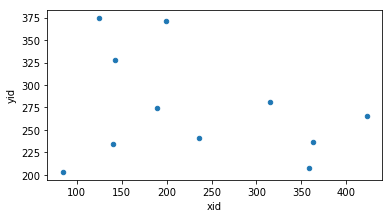

In [97]:
ax = city.plot.scatter(x='xid', y='yid')
ax.set_aspect('equal')
plt.show()

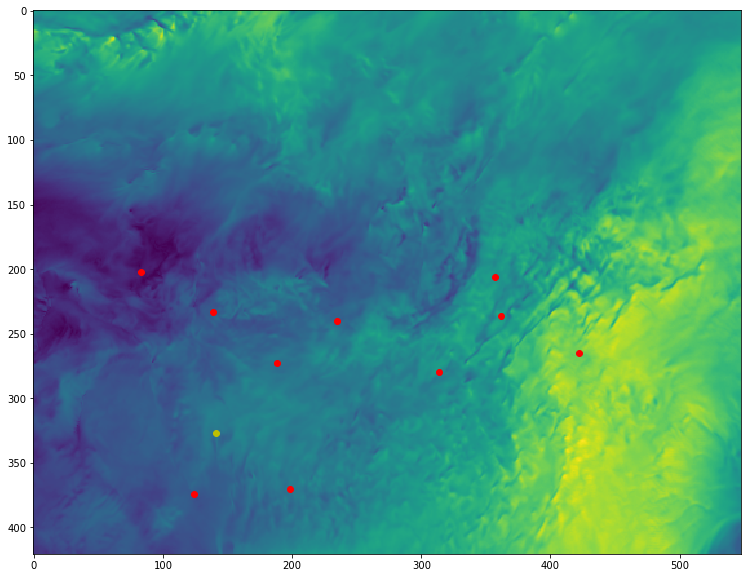

In [99]:
plt.figure(figsize=(20,10))
plt.imshow(train[0,0,10,:,:].T)
for c,x,y in zip(city.cid,city.xid,city.yid):
    if c == 0:
        plt.plot(x-1, y-1, 'yo')
    else:
        plt.plot(x-1, y-1, 'ro')
plt.show()

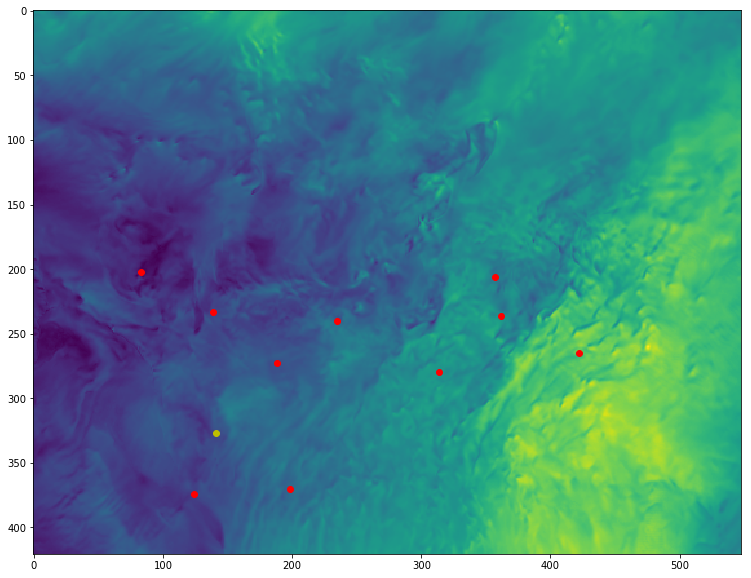

In [64]:
def plot_map(arr):
    plt.figure(figsize=(20,10))
    plt.imshow(train[0,1,10,:,:].T)
    for c,x,y in zip(city.cid,city.xid,city.yid):
        if c == 0:
            plt.plot(x-1,y-1,'yo')
        else:
            plt.plot(x-1,y-1,'ro')
    plt.show()

In [75]:
# Prototyping data for path finding algorithm

# Rescale to 0 - 1
prototype_data = train[0,:,10,:,:] / np.max(train[0,:,10,:,:])
# Save as numpy file
np.save(arr=prototype_data, file='../data/prototype_data')

In [76]:
prototype_data.shape

(18, 548, 421)

In [41]:
train[:,:,:,1,1]

array([[[ 13.8 ,  12.3 ,   9.87,  11.1 ,  13.2 ,  12.9 ,  12.4 ,  12.4 ,
          13.8 ,  12.6 ,  12.8 ],
        [ 12.3 ,  12.  ,  11.2 ,  11.4 ,  11.6 ,  12.1 ,  11.5 ,  10.7 ,
          10.7 ,  11.8 ,  11.7 ],
        [ 13.2 ,  13.2 ,  12.  ,  11.7 ,  12.2 ,  13.3 ,  12.1 ,  11.  ,
          11.2 ,  13.2 ,  12.2 ],
        [ 12.6 ,  16.  ,  15.8 ,  15.7 ,  15.6 ,  16.6 ,  16.6 ,  15.6 ,
          13.7 ,  15.2 ,  15.7 ],
        [ 11.2 ,  11.1 ,  11.4 ,  11.1 ,  11.6 ,  11.3 ,  10.  ,  10.9 ,
           9.82,  11.8 ,  11.3 ],
        [ 12.5 ,  12.4 ,  12.1 ,  12.6 ,  13.3 ,  13.1 ,  12.8 ,  11.  ,
          11.7 ,  12.4 ,  12.6 ],
        [ 11.3 ,  12.2 ,  11.3 ,  12.2 ,  12.4 ,  12.2 ,  11.9 ,  12.1 ,
          11.1 ,  12.1 ,  10.1 ],
        [  9.77,   9.48,   9.95,   9.01,  10.9 ,  10.4 ,   9.4 ,  11.3 ,
           8.58,   9.5 ,  10.7 ],
        [ 10.7 ,  11.1 ,  10.4 ,  10.8 ,  11.  ,  12.4 ,   9.61,  11.5 ,
          10.8 ,  11.7 ,  10.9 ],
        [ 10.5 ,  10.3 ,  10.1 ,  10.